# Analysis and insights Python script: Solar power plant generation analysis
## Part 2: Data transformation

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:15.2f}'.format

## Load data

In [2]:
df = pd.read_pickle("data/df.pickle")
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance
timestamp,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   plant        136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_day       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambient    136472 non-null  float64
 8   t_module     136472 non-null  float64
 9   irradiance   136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 34.8 MB


## Create variables

We shall begin with substracting the date components and incorporate them to the dataframe as new variables.

In [4]:
def date_components(df):
    month = df.index.month
    day = df.index.day
    hour = df.index.hour
    minute = df.index.minute

    return pd.DataFrame({"month":month,"day":day,"hour":hour,"minute":minute})

In [5]:
df = pd.concat([df.reset_index(),date_components(df)], axis=1).set_index("timestamp")
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance,month,day,hour,minute
timestamp,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45


We are going to create the efficiency variable, which consists of the amount (in percentage) of DC power converted to AC power correctly.

We need to be careful because there are going to be DC values of zero. Having a zero in the denominator will return a null value. But in this case it should be a zero of efficiency. Then:

In [6]:
def inverter_efficiency(AC,DC):
    temp = AC / DC * 100
    return temp.fillna(0)

In [7]:
df["efficiency"] = inverter_efficiency(df["kw_ac"],df["kw_dc"])

Check that there are no nulls from the efficiency variable creation.

In [8]:
df["efficiency"].isna().sum()

0

Let's visualise an overview of the efficiency.

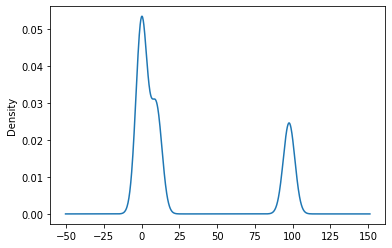

In [9]:
df["efficiency"].plot.kde();

Here we can clearly identify two different groups of efficiency. One of them with an efficiency between 0 and 10% and the other around 100%.

We will analyse this later in the analysis script.

## Rearange dataframe

Before starting the actual analysis of the data it is important to remember how the process of obtaining and delivering the solar power works. We start from solar irradiance directly hitting on the solar modules, then converting the power to DC, then de inverters transform it into AC, and finally the power is delivered to the grid.

To make things easier to analyse, let's rearange the variables in the dataframe in that order.

In [10]:
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance,month,day,hour,minute,efficiency
timestamp,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
